In [95]:
# Importing all required packages
import numpy as np
import pandas as pd
from datetime import datetime as dt

# For Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# To Scale our data
from sklearn.preprocessing import scale

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

from sklearn.datasets import fetch_mldata
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import train_test_split
import pandas as pd

In [96]:
#reading Dataset
mnist = pd.read_csv("train.csv",  sep = ',',encoding = "ISO-8859-1", header= 0)
mnist.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [97]:
mnist.dtypes

label       int64
pixel0      int64
pixel1      int64
pixel2      int64
pixel3      int64
pixel4      int64
pixel5      int64
pixel6      int64
pixel7      int64
pixel8      int64
pixel9      int64
pixel10     int64
pixel11     int64
pixel12     int64
pixel13     int64
pixel14     int64
pixel15     int64
pixel16     int64
pixel17     int64
pixel18     int64
pixel19     int64
pixel20     int64
pixel21     int64
pixel22     int64
pixel23     int64
pixel24     int64
pixel25     int64
pixel26     int64
pixel27     int64
pixel28     int64
            ...  
pixel754    int64
pixel755    int64
pixel756    int64
pixel757    int64
pixel758    int64
pixel759    int64
pixel760    int64
pixel761    int64
pixel762    int64
pixel763    int64
pixel764    int64
pixel765    int64
pixel766    int64
pixel767    int64
pixel768    int64
pixel769    int64
pixel770    int64
pixel771    int64
pixel772    int64
pixel773    int64
pixel774    int64
pixel775    int64
pixel776    int64
pixel777    int64
pixel778  

In [98]:
mnist.describe().T

,count,mean,std,min,25%,50%,75%,max
label,42000.00,4.46,2.89,0.00,2.00,4.00,7.00,9.00
pixel0,42000.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
pixel1,42000.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
pixel2,42000.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
pixel3,42000.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
pixel4,42000.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
pixel5,42000.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
pixel6,42000.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
pixel7,42000.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
pixel8,42000.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [99]:
mnist.shape

(42000, 785)

In [215]:
# Checking for total count and percentage of null values in all columns of the dataframe.

total = pd.DataFrame(mnist.isnull().sum().sort_values(ascending=False), columns=['Total'])
percentage = pd.DataFrame(round(100*(mnist.isnull().sum()/mnist.shape[0]),2).sort_values(ascending=False)\
                          ,columns=['Percentage'])
pd.concat([total, percentage], axis = 1).head()

,Total,Percentage
pixel783,0,0.00
pixel267,0,0.00
pixel265,0,0.00
pixel264,0,0.00
pixel263,0,0.00


### Checking for Outliers

In [216]:
# Checking outliers at 25%,50%,75%,90%,95% and 99%
mnist.describe(percentiles=[.25,.5,.75,.90,.95,.99]).T

,count,mean,std,min,25%,50%,75%,90%,95%,99%,max
label,42000.00,4.46,2.89,0.00,2.00,4.00,7.00,8.00,9.00,9.00,9.00
pixel0,42000.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
pixel1,42000.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
pixel2,42000.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
pixel3,42000.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
pixel4,42000.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
pixel5,42000.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
pixel6,42000.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
pixel7,42000.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
pixel8,42000.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


From the distribution shown above, you can see that there no outliner in your data. The numbers are from 0 to 255.

In [7]:
mnist.shape

(42000, 785)

### Step 4: Test-Train Split

In [100]:
from sklearn.model_selection import train_test_split

In [101]:
# Putting feature variable to X
X = mnist.drop(['label'], axis=1)

X.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [102]:
# Putting response variable to y
y = mnist['label']

y.head()

0    1
1    0
2    1
3    4
4    0
Name: label, dtype: int64

### Step 5: Feature Scaling

In [103]:
from sklearn.preprocessing import StandardScaler

In [104]:
scaler = StandardScaler()

X = scaler.fit_transform(X)

pd.DataFrame(X).head()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,-0.03,-0.03,-0.02,-0.01,-0.01,-0.01,0.00,0.00,0.00,0.00
1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,-0.03,-0.03,-0.02,-0.01,-0.01,-0.01,0.00,0.00,0.00,0.00
2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,-0.03,-0.03,-0.02,-0.01,-0.01,-0.01,0.00,0.00,0.00,0.00
3,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,-0.03,-0.03,-0.02,-0.01,-0.01,-0.01,0.00,0.00,0.00,0.00
4,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,-0.03,-0.03,-0.02,-0.01,-0.01,-0.01,0.00,0.00,0.00,0.00


In [105]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [106]:
pd.DataFrame(X_test).head()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,-0.03,-0.03,-0.02,-0.01,-0.01,-0.01,0.00,0.00,0.00,0.00
1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,-0.03,-0.03,-0.02,-0.01,-0.01,-0.01,0.00,0.00,0.00,0.00
2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,-0.03,-0.03,-0.02,-0.01,-0.01,-0.01,0.00,0.00,0.00,0.00
3,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,-0.03,-0.03,-0.02,-0.01,-0.01,-0.01,0.00,0.00,0.00,0.00
4,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,-0.03,-0.03,-0.02,-0.01,-0.01,-0.01,0.00,0.00,0.00,0.00


### Showing the Images and Labels (MNIST)

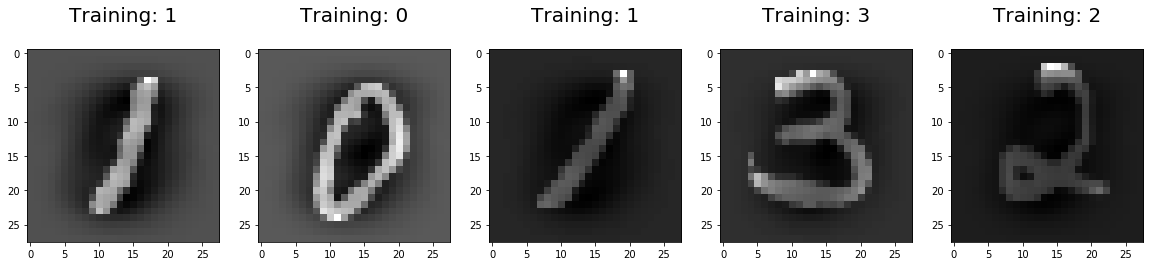

In [15]:
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(X_train[0:5], y_train[0:5])):
 plt.subplot(1, 5, index + 1)
 plt.imshow(np.reshape(image, (28,28)), cmap=plt.cm.gray)
 plt.title('Training: %i\n' % label, fontsize = 20)

### PCA on the data

In [107]:
X_train.shape
# We have 30 variables after creating our dummy variables for our categories

(29399, 784)

In [108]:
#Improting the PCA module
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

In [109]:
#Doing the PCA on the train data
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
  svd_solver='randomized', tol=0.0, whiten=False)

In [110]:
pca.n_components_

784

#### Let's plot the principal components and try to make sense of them
- We'll plot original features on the first 2 principal components as axes

In [111]:
pca.components_

array([[ 9.95569366e-17,  2.22044605e-16,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-2.67945979e-18, -1.38777878e-17, -2.22044605e-16, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-7.15701389e-18, -8.32667268e-17, -3.33066907e-16, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       ...,
       [ 0.00000000e+00, -1.85200049e-01, -5.97277845e-02, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-0.00000000e+00,  1.13591829e-01, -1.19407061e-02, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [-1.00000000e+00,  9.21825969e-13,  2.43271476e-13, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00]])

In [112]:
colnames = list(pd.DataFrame(X_train).columns)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'Feature':colnames})
pcs_df.head()

,PC1,PC2,Feature
0,0.00,-0.00,0
1,0.00,-0.00,1
2,0.00,-0.00,2
3,-0.00,0.00,3
4,0.00,0.00,4


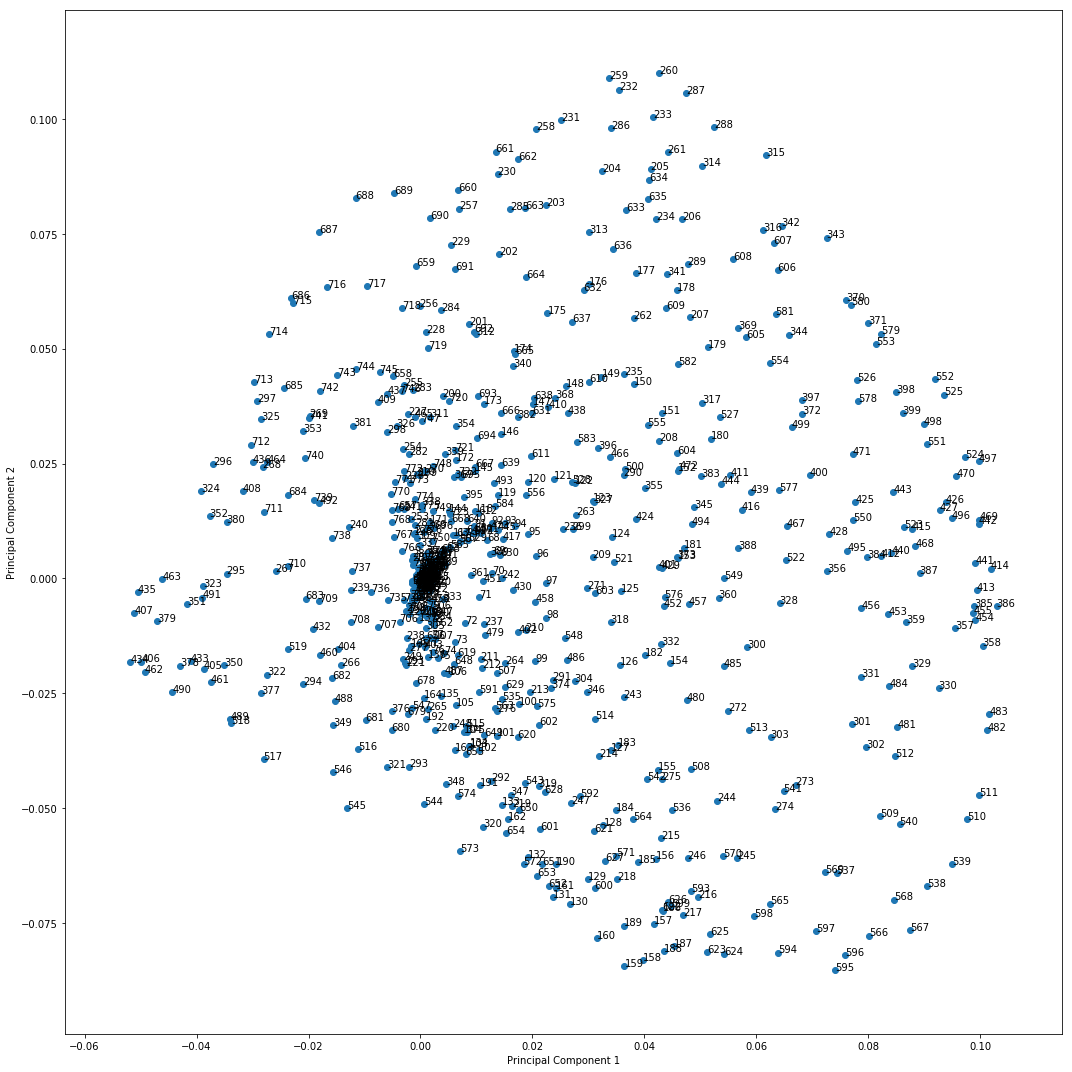

In [22]:
%matplotlib inline
fig = plt.figure(figsize = (15,15))
plt.scatter(pcs_df.PC1, pcs_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pcs_df.Feature):
    plt.annotate(txt, (pcs_df.PC1[i],pcs_df.PC2[i]))
plt.tight_layout()
plt.show()

#### Looking at the screeplot to assess the number of needed principal components

In [113]:
pd.options.display.float_format = '{:.2f}'.format
pca.explained_variance_ratio_

array([5.75569977e-02, 4.14074296e-02, 3.82710513e-02, 2.95285735e-02,
       2.59109754e-02, 2.26088588e-02, 1.96004602e-02, 1.78009553e-02,
       1.57390319e-02, 1.44674440e-02, 1.38510711e-02, 1.24776588e-02,
       1.13600239e-02, 1.11844606e-02, 1.04948996e-02, 1.03251930e-02,
       9.68823263e-03, 9.42225410e-03, 9.34714347e-03, 9.08071787e-03,
       8.58576383e-03, 8.20688236e-03, 7.78547897e-03, 7.54075032e-03,
       7.39573051e-03, 7.06732904e-03, 7.02933836e-03, 6.65611801e-03,
       6.44899343e-03, 6.29622162e-03, 6.23691799e-03, 6.05211877e-03,
       6.00434152e-03, 5.91437594e-03, 5.79200678e-03, 5.69898516e-03,
       5.63604011e-03, 5.53479508e-03, 5.38023387e-03, 5.36966219e-03,
       5.20797044e-03, 5.13473042e-03, 5.03433397e-03, 4.94799645e-03,
       4.84713916e-03, 4.79600979e-03, 4.73808796e-03, 4.60032665e-03,
       4.51624677e-03, 4.46776354e-03, 4.34529650e-03, 4.32009333e-03,
       4.26902495e-03, 4.22084539e-03, 4.21736988e-03, 4.11157703e-03,
      

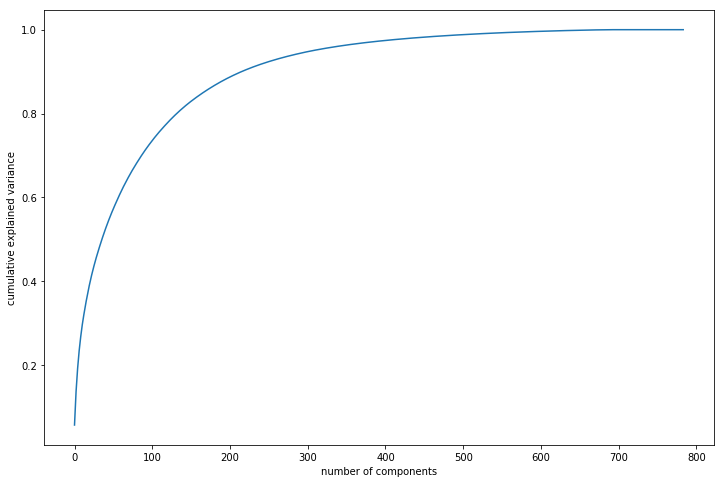

In [114]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [115]:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [116]:
from sklearn.linear_model import LogisticRegression

In [117]:
logisticRegr = LogisticRegression(solver = 'lbfgs')

In [118]:
logisticRegr.fit(X_train_pca, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='lbfgs', tol=0.0001,
          verbose=0, warm_start=False)

In [119]:
logisticRegr.predict(X_train_pca[0:10])

array([1, 0, 1, 3, 2, 3, 5, 0, 1, 9], dtype=int64)

In [120]:
logisticRegr.predict(X_train_pca)

array([1, 0, 1, ..., 1, 7, 9], dtype=int64)

In [121]:
score = logisticRegr.score(X_train_pca, y_train)
print(score)

0.9422769481955169


In [122]:
logisticRegr.predict(X_test_pca)

array([5, 0, 2, ..., 5, 7, 7], dtype=int64)

In [123]:
score = logisticRegr.score(X_test_pca, y_test)
print(score)

0.905


In [124]:
X_train.shape
# We have 30 variables after creating our dummy variables for our categories

(29399, 784)

In [125]:
#Improting the PCA module
from sklearn.decomposition import PCA
pca_again = PCA(0.90)

In [126]:
#Doing the PCA on the train data
pca_again.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=0.9, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [127]:
pca_again.n_components_

216

In [128]:
pca_again.components_

array([[-4.70773604e-19, -5.55111512e-17,  1.11022302e-16, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [-3.29423822e-19, -8.32667268e-17,  2.77555756e-17, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 4.22515850e-19, -5.55111512e-17,  5.55111512e-17, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [-2.42625420e-19,  1.09287579e-16, -9.97465999e-17, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [-1.58381525e-20,  5.33969570e-17,  1.44144679e-16, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 7.48783331e-19,  7.97972799e-17,  2.25514052e-17, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

In [129]:
colnames = list(pd.DataFrame(X_train).columns)
pcs_df = pd.DataFrame({'PC1':pca_again.components_[0],'PC2':pca_again.components_[1], 'Feature':colnames})
pcs_df.head()

,PC1,PC2,Feature
0,-0.00,-0.00,0
1,-0.00,-0.00,1
2,0.00,0.00,2
3,-0.00,0.00,3
4,-0.00,0.00,4


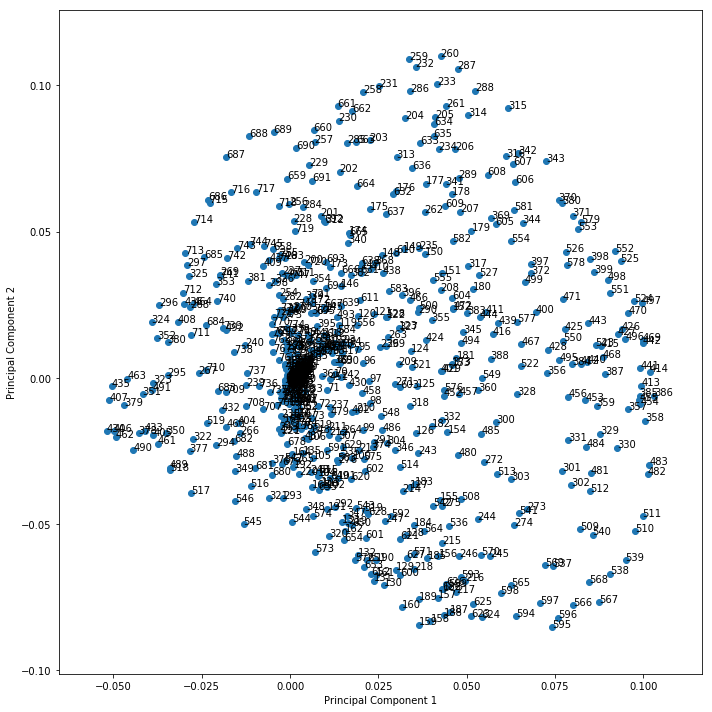

In [40]:
%matplotlib inline
fig = plt.figure(figsize = (10,10))
plt.scatter(pcs_df.PC1, pcs_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pcs_df.Feature):
    plt.annotate(txt, (pcs_df.PC1[i],pcs_df.PC2[i]))
plt.tight_layout()
plt.show()

In [130]:
X_train_pca = pca_again.transform(X_train)
X_test_pca = pca_again.transform(X_test)

In [131]:
from sklearn.linear_model import LogisticRegression

In [132]:
logisticRegr = LogisticRegression(solver = 'lbfgs')

In [133]:
model_pca = logisticRegr.fit(X_train_pca, y_train)
model_pca

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='lbfgs', tol=0.0001,
          verbose=0, warm_start=False)

In [134]:
logisticRegr.predict(X_train_pca[0:10])

array([1, 0, 1, 3, 2, 3, 5, 0, 1, 9], dtype=int64)

In [135]:
logisticRegr.predict(X_train_pca)

array([1, 0, 1, ..., 1, 7, 9], dtype=int64)

In [136]:
score = logisticRegr.score(X_train_pca, y_train)
print(score)

0.9264600836763155


In [137]:
logisticRegr.predict(X_test_pca)

array([5, 0, 2, ..., 5, 7, 7], dtype=int64)

In [138]:
score = logisticRegr.score(X_test_pca, y_test)
print(score)

0.9135714285714286


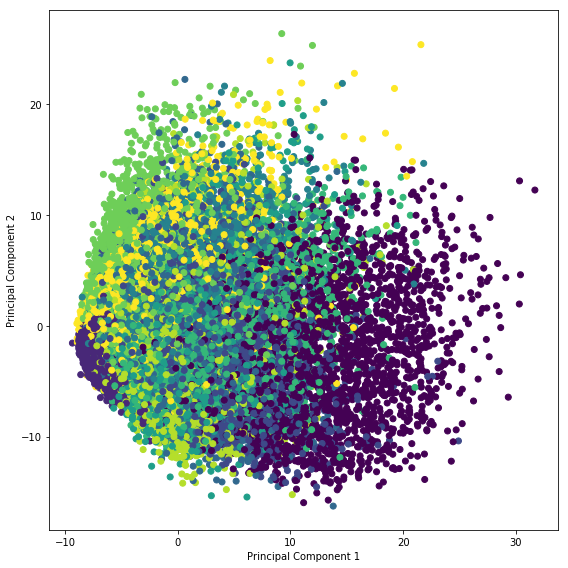

In [50]:
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(X_train_pca[:,0], X_train_pca[:,1], c = y_train)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


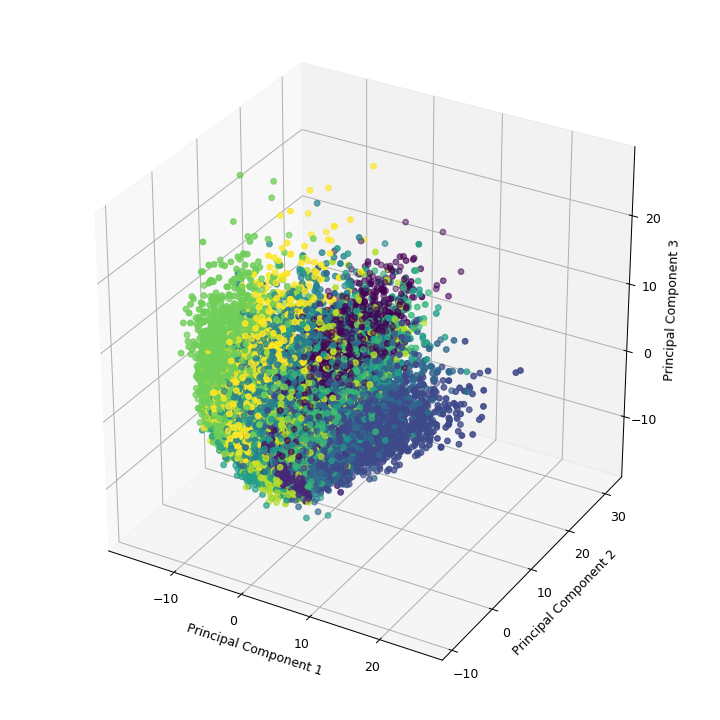

In [139]:
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(8,8))
ax = Axes3D(fig)
ax = plt.axes(projection='3d')
ax.scatter(X_train_pca[:,2], X_train_pca[:,0], X_train_pca[:,1],zdir='z', s=20, marker = 'o', c=y_train)
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.tight_layout()
plt.show()

In [139]:
X_train.shape
# We have 30 variables after creating our dummy variables for our categories

(29399, 784)

In [140]:
#Improting the PCA module
from sklearn.decomposition import PCA
pca_last = PCA(n_components=100)

In [141]:
#Doing the PCA on the train data
pca_last.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=100, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [142]:
pca_last.n_components_

100

In [143]:
pca_last.components_

array([[ 8.72214906e-18,  7.74980862e-18,  4.94945610e-18, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 3.88148429e-17,  1.81156568e-17,  8.96215168e-18, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 4.64233772e-17, -3.03689047e-17, -3.13319581e-19, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [-2.47820603e-18, -4.56847925e-18, -4.59612844e-17, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [ 4.76895060e-17,  4.25943809e-17, -1.34013259e-17, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [ 2.89816751e-17,  1.23569169e-17,  3.45137572e-17, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

In [144]:
colnames = list(pd.DataFrame(X_train).columns)
pcs_df = pd.DataFrame({'PC1':pca_last.components_[0],'PC2':pca_last.components_[1], 'Feature':colnames})
pcs_df.head()

,PC1,PC2,Feature
0,0.00,0.00,0
1,0.00,0.00,1
2,0.00,0.00,2
3,-0.00,-0.00,3
4,0.00,0.00,4


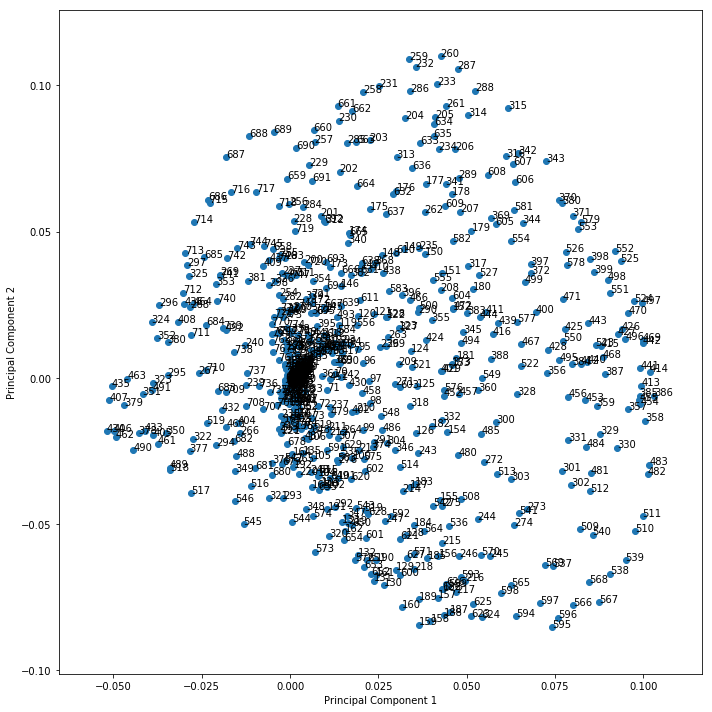

In [57]:
%matplotlib inline
fig = plt.figure(figsize = (10,10))
plt.scatter(pcs_df.PC1, pcs_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pcs_df.Feature):
    plt.annotate(txt, (pcs_df.PC1[i],pcs_df.PC2[i]))
plt.tight_layout()
plt.show()

In [145]:
X_train_pca = pca_last.transform(X_train)
X_test_pca = pca_last.transform(X_test)

In [146]:
from sklearn.linear_model import LogisticRegression

In [147]:
logisticRegr = LogisticRegression(solver = 'lbfgs')

In [148]:
model_pca = logisticRegr.fit(X_train_pca, y_train)
model_pca

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='lbfgs', tol=0.0001,
          verbose=0, warm_start=False)

In [149]:
logisticRegr.predict(X_train_pca[0:10])

array([1, 0, 1, 3, 2, 3, 5, 0, 1, 7], dtype=int64)

In [150]:
predictions = logisticRegr.predict(X_train_pca)
predictions

array([1, 0, 1, ..., 1, 7, 9], dtype=int64)

In [151]:
score = logisticRegr.score(X_train_pca, y_train)
print(score)

0.9152011973196367


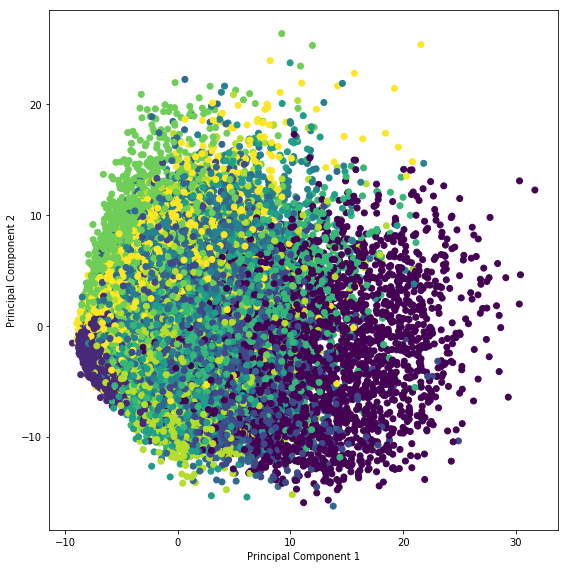

In [65]:
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(X_train_pca[:,0], X_train_pca[:,1], c = y_train)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


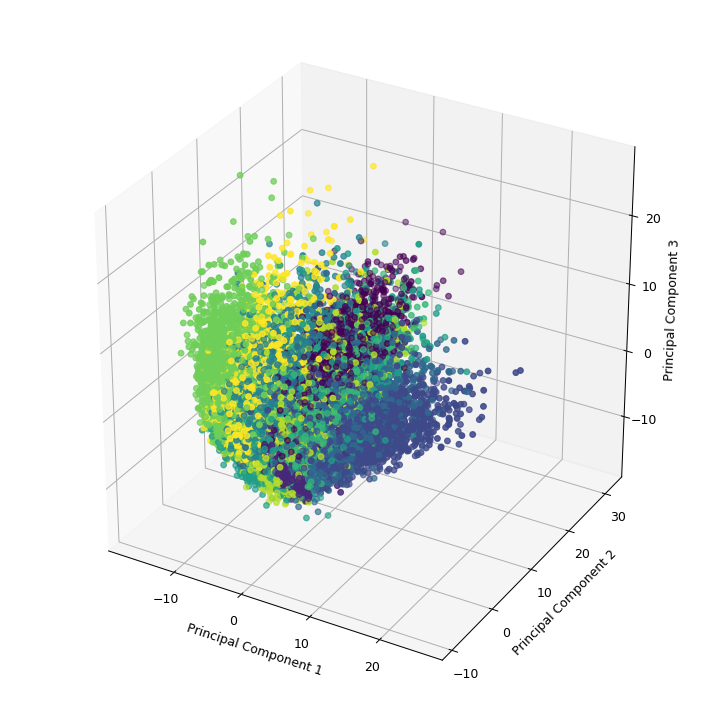

In [76]:
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(8,8))
ax = Axes3D(fig)
ax = plt.axes(projection='3d')
ax.scatter(X_train_pca[:,2], X_train_pca[:,0], X_train_pca[:,1],zdir='z', s=20, marker = 'o', c=y_train)
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.tight_layout()
plt.show()

In [152]:
import statsmodels.api as sm
# Logistic regression model
logpca = sm.GLM(y_train,(sm.add_constant(X_train_pca)), family = sm.families.Binomial())
logpca.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  label   No. Observations:                29399
Model:                            GLM   Df Residuals:                    29298
Model Family:                Binomial   Df Model:                          100
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Sat, 09 Feb 2019   Deviance:                          nan
Time:                        23:18:26   Pearson chi2:                 2.68e+21
No. Iterations:                   100   Covariance Type:             nonrobust
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        1.54e+18   3.91e+05   3.94e+12      0.000    1.54e+18    1.54e+18
x1         -5.168e+16   6.15e+04  -8.41e+11      0.000   -5.17e+16   -5.17e+16
x2          5.835e+16   7.25e+04   8.05e+11      0.000    5.83e+16    5.83e+16
x3         -8.241e+16   7.54e+04  -1.09e+12      0.000   -8.24e+16   -8.24e+16
x4          2.846e+15   8.58e+04   3.32e+10      0.000    2.85e+15    2.85e+15
x5         -9.879e+16   9.16e+04  -1.08e+12      0.000   -9.88e+16   -9.88e+16
x6          4.775e+16   9.81e+04   4.87e+11      0.000    4.78e+16    4.78e+16
x7          -3.05e+16   1.05e+05   -2.9e+11      0.000   -3.05e+16   -3.05e+16
x8         -9.148e+15   1.11e+05  -8.28e+10      0.000   -9.15e+15   -9.15e+15
x9          3.533e+16   1.18e+05   3.01e+11      0.000    3.53e+16    3.53e+16
x10        -1.378e+16   1.23e+05  -1.12e+11      0.000   -1.38e+16   -1.38e+16
x11         3.589e+15   1.25e+05   2.86e+10      0.000    3.59e+15    3.59e+15
x12             3e+16   1.32e+05   2.27e+11      0.000       3e+16       3e+16
x13        -1.275e+16   1.38e+05  -9.21e+10      0.000   -1.28e+16   -1.28e+16
x14        -3.514e+16   1.39e+05  -2.52e+11      0.000   -3.51e+16   -3.51e+16
x15         1.058e+16   1.44e+05   7.35e+10      0.000    1.06e+16    1.06e+16
x16         2.264e+16   1.45e+05   1.56e+11      0.000    2.26e+16    2.26e+16
x17        -2.463e+16    1.5e+05  -1.64e+11      0.000   -2.46e+16   -2.46e+16
x18         4.383e+15   1.52e+05   2.88e+10      0.000    4.38e+15    4.38e+15
x19         1.852e+16   1.53e+05   1.21e+11      0.000    1.85e+16    1.85e+16
x20        -4.123e+16   1.55e+05  -2.66e+11      0.000   -4.12e+16   -4.12e+16
x21         4.661e+15   1.59e+05   2.93e+10      0.000    4.66e+15    4.66e+15
x22         7.709e+16   1.63e+05   4.74e+11      0.000    7.71e+16    7.71e+16
x23         5.186e+16   1.67e+05    3.1e+11      0.000    5.19e+16    5.19e+16
x24         1.637e+16    1.7e+05   9.64e+10      0.000    1.64e+16    1.64e+16
x25         6.489e+16   1.71e+05   3.78e+11      0.000    6.49e+16    6.49e+16
x26         3.958e+16   1.75e+05   2.26e+11      0.000    3.96e+16    3.96e+16
x27         -3.62e+16   1.76e+05  -2.06e+11      0.000   -3.62e+16   -3.62e+16
x28        -2.806e+16   1.81e+05  -1.55e+11      0.000   -2.81e+16   -2.81e+16
x29        -2.419e+16   1.84e+05  -1.32e+11      0.000   -2.42e+16   -2.42e+16
x30        -4.987e+16   1.86e+05  -2.68e+11      0.000   -4.99e+16   -4.99e+16
x31         1.538e+15   1.87e+05   8.23e+09      0.000    1.54e+15    1.54e+15
x32         1.914e+16    1.9e+05   1.01e+11      0.000    1.91e+16    1.91e+16
x33         1.035e+16    1.9e+05   5.44e+10      0.000    1.03e+16    1.03e+16
x34         8.579e+15   1.92e+05   4.47e+10      0.000    8.58e+15    8.58e+15
x35         1.844e+16   1.94e+05   9.52e+10      0.000    1.84e+16    1.84e+16
x36         -3.69e+16   1.95e+05  -1.89e+11      0.000   -3.69e+16   -3.69e+16
x3

#### Checking VIFs

In [153]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [154]:
vif = pd.DataFrame()
vif['Features'] = pd.DataFrame(X_train_pca).columns
vif['VIF'] = [variance_inflation_factor(pd.DataFrame(X_train_pca).values, i) for i in range(X_train_pca.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif.head()

,Features,VIF
0,0,1.00
63,63,1.00
73,73,1.00
72,72,1.00
71,71,1.00


## Confusion Matrix (Digits Dataset)

In [155]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [156]:
cm = metrics.confusion_matrix(y_train, predictions)
print(cm)

[[2809    0    5    7    4   20   20    0   23    2]
 [   1 3189   14    9    4    9    4    7   21    2]
 [  17   27 2658   49   40   21   33   44   82    6]
 [  11   14   77 2707    4   93   15   32   69   33]
 [   3   15   21    4 2679    7   17    7   20   95]
 [  31   13   20  124   32 2206   59   18   77   37]
 [  20    6   17    0   15   45 2766    2   16    0]
 [  12   15   38    8   26    9    1 2912    9   87]
 [  22   55   33   85   10   89   18   16 2445   54]
 [  16   18    9   57  109   27    1  105   24 2535]]


## Confusion Matrix in Seaborn

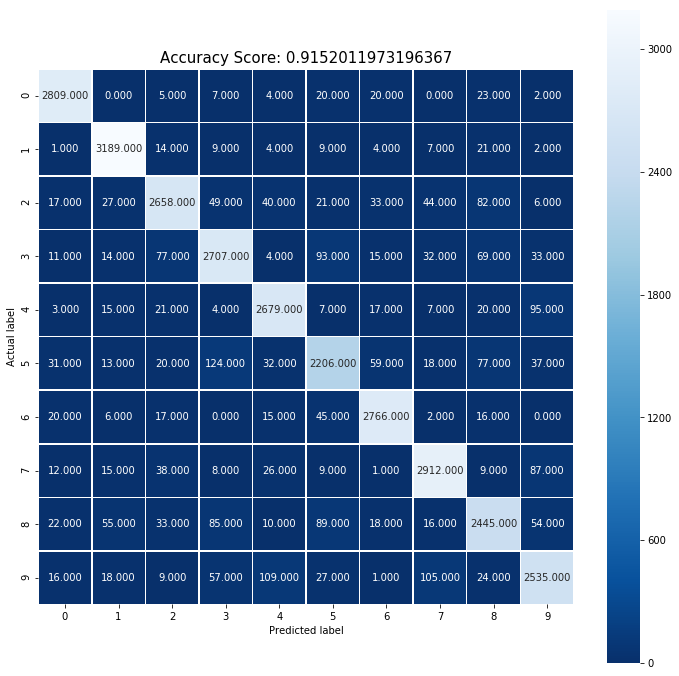

In [157]:
plt.figure(figsize=(12,12))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

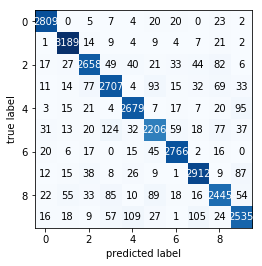

In [158]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_confusion_matrix

fig, ax = plot_confusion_matrix(conf_mat=cm)
plt.show()

## Calculating accuracy

In [159]:
print(metrics.accuracy_score(y_train, predictions))

0.9152011973196367


## Calculating recall

In [160]:
recall = np.diag(cm) / np.sum(cm, axis = 1)
recall

array([0.97197232, 0.97822086, 0.89284515, 0.88608838, 0.93410042,
       0.84294994, 0.95808798, 0.93423163, 0.86487443, 0.87383661])

In [161]:
from sklearn.metrics import precision_score, recall_score

In [162]:
recall_score(y_train, predictions,average='macro')

0.913720771098799

## Calculating precision

In [163]:
precision = np.diag(cm) / np.sum(cm, axis = 0)
precision

array([0.95479266, 0.95137232, 0.91908714, 0.88754098, 0.91652412,
       0.8733175 , 0.94274029, 0.92650334, 0.8776023 , 0.8891617 ])

In [164]:
precision_score(y_train, predictions,average='macro')

0.9138642332609954

In [165]:
from sklearn.metrics import precision_recall_fscore_support as score

precision, recall, fscore, support = score(y_train, predictions)

print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

precision: [0.95479266 0.95137232 0.91908714 0.88754098 0.91652412 0.8733175
 0.94274029 0.92650334 0.8776023  0.8891617 ]
recall: [0.97197232 0.97822086 0.89284515 0.88608838 0.93410042 0.84294994
 0.95808798 0.93423163 0.86487443 0.87383661]
fscore: [0.9633059  0.9646098  0.90577611 0.88681409 0.9252288  0.85786506
 0.95035217 0.93035144 0.87119188 0.88143255]
support: [2890 3260 2977 3055 2868 2617 2887 3117 2827 2901]


## overall measures of precision

In [166]:
print(np.mean(recall))
print(np.mean(precision))

0.913720771098799
0.9138642332609954


In [167]:
from sklearn.metrics import classification_report
print(classification_report(y_train, predictions))

             precision    recall  f1-score   support

          0       0.95      0.97      0.96      2890
          1       0.95      0.98      0.96      3260
          2       0.92      0.89      0.91      2977
          3       0.89      0.89      0.89      3055
          4       0.92      0.93      0.93      2868
          5       0.87      0.84      0.86      2617
          6       0.94      0.96      0.95      2887
          7       0.93      0.93      0.93      3117
          8       0.88      0.86      0.87      2827
          9       0.89      0.87      0.88      2901

avg / total       0.91      0.92      0.91     29399



## Predictions on the test sample

In [168]:
predict_test = logisticRegr.predict(X_test_pca)
predict_test

array([5, 0, 2, ..., 5, 7, 7], dtype=int64)

In [169]:
score = logisticRegr.score(X_test_pca, y_test)
print(score)

0.9056349206349207


In [170]:
print(metrics.accuracy_score(y_test, predict_test))

0.9056349206349207


In [171]:
recall_score(y_test, predict_test,average='macro')

0.9043565577404626

In [172]:
precision_score(y_test, predict_test,average='macro')

0.9044475186215323

In [173]:
from sklearn.metrics import precision_recall_fscore_support as score

precision, recall, fscore, support = score(y_test, predict_test)

print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

precision: [0.94794953 0.93851351 0.89585097 0.89155693 0.89477977 0.87051619
 0.94220111 0.91660171 0.86716792 0.87933754]
recall: [0.96779388 0.97542135 0.882402   0.88811728 0.91112957 0.84465195
 0.952      0.91588785 0.83980583 0.86635587]
fscore: [0.95776892 0.95661157 0.88907563 0.88983378 0.90288066 0.85738906
 0.94707521 0.91624464 0.85326757 0.87279843]
support: [1242 1424 1199 1296 1204 1178 1250 1284 1236 1287]


In [174]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predict_test))

             precision    recall  f1-score   support

          0       0.95      0.97      0.96      1242
          1       0.94      0.98      0.96      1424
          2       0.90      0.88      0.89      1199
          3       0.89      0.89      0.89      1296
          4       0.89      0.91      0.90      1204
          5       0.87      0.84      0.86      1178
          6       0.94      0.95      0.95      1250
          7       0.92      0.92      0.92      1284
          8       0.87      0.84      0.85      1236
          9       0.88      0.87      0.87      1287

avg / total       0.91      0.91      0.91     12600



In [201]:
from sklearn.model_selection import cross_val_score

lr = LogisticRegression(solver = 'lbfgs')
scores = cross_val_score(lr, X, y, cv=10)
scores.sort()
accuracy = scores.mean()

print(scores)
print(accuracy)

[0.90592998 0.90755301 0.90794481 0.90854965 0.91025946 0.9106039
 0.91123275 0.91277407 0.91348904 0.91404762]
0.9102384300834145


pd.DataFrame(data = [[1.00, 784, 48.94, .9158],
                     [.99, 541, 34.69, .9169],
                     [.95, 330, 13.89, .92],
                     [.90, 236, 10.56, .9168],
                     [.85, 184, 8.85, .9156]], 
             columns = ['Variance Retained',
                      'Number of Components', 
                      'Time (seconds)',
                      'Accuracy'])

In [175]:
#reading Dataset
holdout = pd.read_csv("test.csv",  sep = ',',encoding = "ISO-8859-1", header= 0)
holdout.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [176]:
holdout.shape

(28000, 784)

In [246]:
# Checking for total count and percentage of null values in all columns of the dataframe.

total = pd.DataFrame(holdout.isnull().sum().sort_values(ascending=False), columns=['Total'])
percentage = pd.DataFrame(round(100*(holdout.isnull().sum()/holdout.shape[0]),2).sort_values(ascending=False)\
                          ,columns=['Percentage'])
pd.concat([total, percentage], axis = 1).head()

,Total,Percentage
pixel783,0,0.00
pixel268,0,0.00
pixel266,0,0.00
pixel265,0,0.00
pixel264,0,0.00


In [91]:
holdout.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Step 5: Feature Scaling

In [177]:
from sklearn.preprocessing import StandardScaler

In [178]:
holdout = scaler.transform(holdout)

pd.DataFrame(holdout).head()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,-0.03,-0.03,-0.02,-0.01,-0.01,-0.01,0.00,0.00,0.00,0.00
1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,-0.03,-0.03,-0.02,-0.01,-0.01,-0.01,0.00,0.00,0.00,0.00
2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,-0.03,-0.03,-0.02,-0.01,-0.01,-0.01,0.00,0.00,0.00,0.00
3,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,-0.03,-0.03,-0.02,-0.01,-0.01,-0.01,0.00,0.00,0.00,0.00
4,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,-0.03,-0.03,-0.02,-0.01,-0.01,-0.01,0.00,0.00,0.00,0.00


In [180]:
holdout_pca = pca_last.transform(holdout)
pd.DataFrame(holdout_pca).head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,11.74,-4.57,2.24,5.26,-0.73,7.79,1.55,0.88,-4.83,-1.96,...,1.58,0.24,-0.56,-0.20,-0.47,2.20,0.65,0.02,0.88,1.45
1,18.32,0.46,-5.72,1.39,11.99,-3.59,-6.11,-0.26,-0.03,-6.10,...,0.22,1.22,1.87,-0.09,0.29,0.66,0.00,-0.49,0.25,0.60
2,-5.28,-0.49,-0.96,0.59,2.21,1.89,0.35,-2.57,0.99,1.70,...,-0.79,1.99,0.45,1.41,-0.10,-0.71,0.17,1.52,1.00,-0.31
3,-3.37,-0.23,-3.57,6.26,0.21,1.71,0.90,0.44,-1.53,1.47,...,-1.40,1.05,0.04,0.62,1.18,-1.21,-1.23,0.54,0.60,-0.61
4,-1.64,-3.13,7.42,0.89,-1.55,-0.45,0.57,2.45,-6.23,-0.76,...,1.14,-0.89,-0.34,-0.06,0.13,0.60,1.30,-1.49,0.14,-0.18


In [181]:
predict_holdout = logisticRegr.predict(holdout_pca)
predict_holdout

array([2, 0, 9, ..., 3, 9, 2], dtype=int64)

## Creating Kaggle submission file

In [192]:
a=np.arange(1,holdout.shape[0]+1)
a

array([    1,     2,     3, ..., 27998, 27999, 28000])

In [193]:
holdout_ids = np.arange(1,holdout.shape[0]+1)
submission_df = {"ImageId": holdout_ids,"Label": predict_holdout}
submission = pd.DataFrame(submission_df)
submission.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,7
4,5,3


In [194]:
submission.to_csv("submission.csv",index=False)